<a href="https://colab.research.google.com/github/dbasu03/cnn/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 80.1MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s] 


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
#create cnn model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 95s 132ms/step - loss: 0.6143 - accuracy: 0.6561 - val_loss: 0.5009 - val_accuracy: 0.7523
Epoch 2/10
625/625 [==============================] - 84s 133ms/step - loss: 0.4733 - accuracy: 0.7731 - val_loss: 0.4181 - val_accuracy: 0.8013
Epoch 3/10
625/625 [==============================] - 84s 133ms/step - loss: 0.3552 - accuracy: 0.8410 - val_loss: 0.3360 - val_accuracy: 0.8492
Epoch 4/10
625/625 [==============================] - 83s 133ms/step - loss: 0.2099 - accuracy: 0.9144 - val_loss: 0.2429 - val_accuracy: 0.9050
Epoch 5/10
625/625 [==============================] - 83s 133ms/step - loss: 0.1196 - accuracy: 0.9553 - val_loss: 0.1897 - val_accuracy: 0.9298
Epoch 6/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 0.2117 - val_accuracy: 0.9353
Epoch 7/10
625/625 [==============================] - 84s 135ms/step - loss: 0.0536 - accuracy: 0.9820 - val_loss: 0.2095 - val_ac

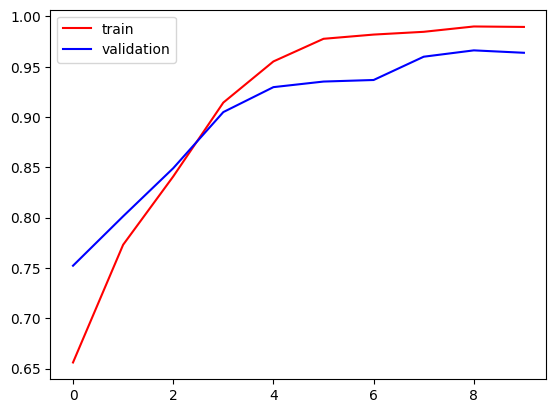

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()